In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
import time

In [2]:
# partice properties and constants
scale = 1e-9
mass = 9.109e-31
hbar = 1.055e-34
charge = -1.602e-19
N = 128

In [3]:
def lanczos(v0,m,q):
    #Writing Lanczos Algorithm
    #Initial Iteration
    w = []
    beta = [0]
    v = [v0]
    wp = []
    alpha = []
    w0p = Hx(v0, q, phi)
    wp.append(w0p)
    alpha0 = np.conj(w0p.T) @ v0
    alpha.append(alpha0)
    w0 = w0p - alpha0 * v0
    w.append(w0)
    #Repeated Iteration
    for j in range(1,m):
        betaj = np.linalg.norm(w[j-1])
        beta.append(betaj)
        #print("beta" + str(j) + ": " + str(betaj))
        vj = w[j-1]/beta[j]
        v.append(vj)
        wjp = Hx(v[j], q, phi)
        wp.append(wjp)
        alphaj = np.conj(wp[j].T) @ v[j]
        alpha.append(alphaj)
        wj = wp[j] - alpha[j] * v[j] - beta[j] * v[j-1]
        w.append(wj)   
        
    v = np.array(v)
    V = v.T
    Teigenvals, Teigenvecs = eigh_tridiagonal(alpha,beta[1:]) #tridiagonal matrix with alphas on main diagonal and betas on adjacent ones
    groundstate_eigenval = Teigenvals[0]
    groundstate_eigenvec = Teigenvecs[:,0]
    print(groundstate_eigenval)
    return V @ groundstate_eigenvec   
    
    
    
    

In [4]:
xy1 = np.mgrid[0:N,0:N]
xy = xy1.reshape(2,-1)
xp = np.roll(xy1,-1,axis=1).reshape(2,-1)
xm = np.roll(xy1,1,axis=1).reshape(2,-1)
yp = np.roll(xy1,-1,axis=2).reshape(2,-1)
ym = np.roll(xy1,1,axis=2).reshape(2,-1)

def Hx(x,q,phi):
    #Create discrete version of Hamiltonian operator
    x = x.reshape(N,-1)
    ax = np.zeros(x.shape)

    #Use discrete schrodinger equation
    ax[xy[0,:],xy[1,:]] = -hbar/(2*mass*scale*scale)*(-4*x[xy[0,:],xy[1,:]] + x[xp[0,:],xp[1,:]] + x[xm[0,:],xm[1,:]] +  x[yp[0,:],yp[1,:]] + x[ym[0,:],ym[1,:]])

    #reset boundary
    ax[0,:] = 0
    ax[:,0] = 0
    ax[N-1,:] = 0
    ax[:,N-1] = 0


    return ax.flatten()

    

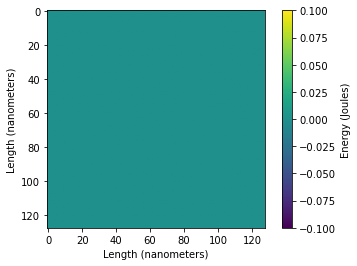

In [5]:
#Creating potential
phi = np.zeros((N,N))
#Creating grid
X=np.linspace(0,N-1,N)
Y=np.linspace(0,N-1,N)
X=X.astype(int)
Y=Y.astype(int)

                   
Z = charge * phi[X][Y]
fig, ax = plt.subplots()
#Plot Potential
plt.imshow(Z)
cbar = plt.colorbar()
cbar.set_label("Energy (Joules)")
plt.xlabel("Length (nanometers)")
plt.ylabel("Length (nanometers)")
plt.rcParams['figure.dpi']=2000
plt.show()


In [6]:
#Create starting v0
v0 = np.ones((N,N))

for i in range(N):
    for j in range(N):
        if(i == 0 or i == N-1 or j == 0 or j == N-1):
            v0[i][j] = 0
            
v0 = v0/np.linalg.norm(v0)
#fig, ax = plt.subplots()
#Plot Potential
#plt.imshow(v0)
#plt.colorbar()
#plt.show()

v0 = v0.flatten()


In [7]:
iterations = 300
t1 = time.time()
for i in range(iterations):
    #input previous v0 into lanczos algorithm
    result = lanczos(v0,10,charge)
    #normalize result
    v0 = result/np.linalg.norm(result)
t2 = time.time()
print("Time taken: " + str(round(t2-t1,3)) + " seconds.")

248611763814.63055
159003997776.68933
129815897653.86203
113847254325.60013
103690297231.8473
96593818446.22447
91387327467.25186
87412178203.96144
84306978088.3111
81835001533.28703
79845626189.26941
78231016058.57335
76914204652.44933
75836568980.51872
74952840114.36421
74227225254.51193
73630913641.31635
73140685864.82233
72737515199.33429
72405928939.94902
72133166088.81668
71908805786.47809
71724238473.66772
71572419077.91167
71447526958.07448
71344793928.26016
71260282507.59909
71190764963.95995
71133577453.65393
71086535235.82812
71047836180.5211
71016001703.83768
70989812676.79631
70968268518.38254
70950544496.34282
70935963530.42891
70923967677.32195
70914098766.27151
70905979319.52602
70899299290.89717
70893803279.00226
70889281464.69447
70885561029.98714
70882499975.02583
70879981352.7389
70877909055.7571
70876203939.01247
70874800951.8259
70873646527.98363
70872696635.05208
70871915016.30348
70871271864.75482
70870742638.14232
70870307158.08276
70869948810.86617
70869653935

In [8]:
wavefunction = np.reshape(v0, (N,N))
X=np.linspace(0,N-1,N)
Y=np.linspace(0,N-1,N)
X=X.astype(int)
Y=Y.astype(int)
                   
wavefunction = wavefunction[X][Y]
fig, ax = plt.subplots()
#plot wavefunction squared to give probability plot
probability = wavefunction**2
norm = np.sum(probability)
probability = probability / norm
plt.imshow(probability)
cbar = plt.colorbar()
cbar.set_label("Probability per square nanometer")
plt.xlabel("Length (nanometers)")
plt.ylabel("Length (nanometers)")
plt.show()

In [9]:
WF = np.zeros((N,N))
pi = np.pi
for i in range(N):
    for j in range(N):
        WF[i][j] = 2/(N-1)/scale * np.sin(pi*i*scale/(N-1)/scale) * np.sin(pi*j*scale/(N-1)/scale)
        #print(WF[i][j])
actual = WF**2
Norm = np.sum(actual)
actual =  actual / Norm
plt.imshow(actual)
cbar = plt.colorbar()
cbar.set_label("Probability per square nanometer")
plt.xlabel("Length (nanometers)")
plt.ylabel("Length (nanometers)")
plt.show()

In [10]:
diff = actual - probability
print(diff[64][64])
plt.imshow(diff)
cbar = plt.colorbar()
cbar.set_label("Difference in probability per square nanometer")
plt.xlabel("Length (nanometers)")
plt.ylabel("Length (nanometers)")
plt.show()

7.209944447028604e-17
